## 1. Explore two image enhancement techniques and apply them to a specific medical image.

**Histogram Based Methods**

> CLAHE (Contrast Limited Adaptive Histogram Equalization):




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


For **grayscale** Formate

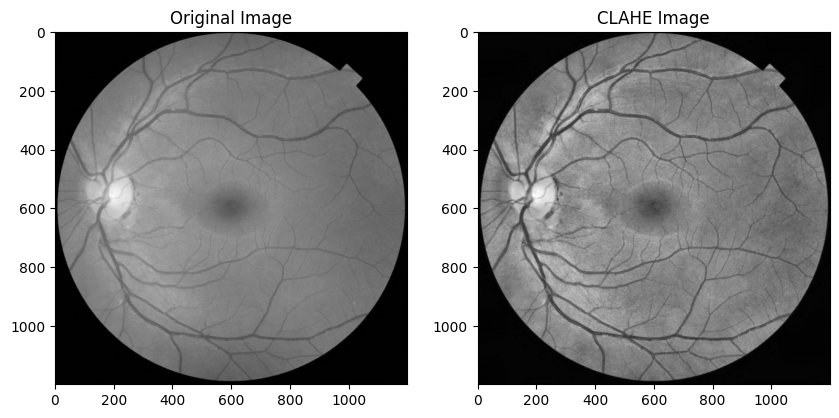

In [ ]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(15, 15))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/Fundus_photograph_of_normal_left_eye.jpg'
image = cv2.imread(image_path, 0)


#image = cv2.imread(image_path)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")


For **RGB** Formate

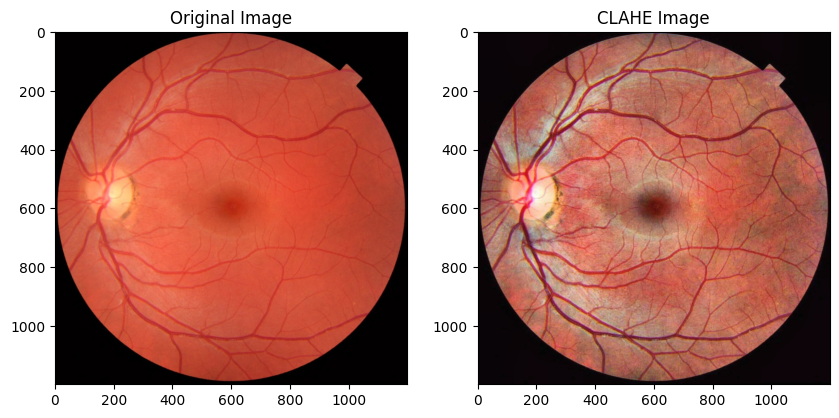

In [46]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(10, 10))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/Fundus_photograph_of_normal_left_eye.jpg'
#image = cv2.imread(image_path, 0)


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")





**Original Image:** Likely has lower contrast. Details in darker or brighter areas may be obscured.
Subtle structures, such as tiny capillaries, may blend into the background.  

**CLAHE Image:** Contrast Limited Adaptive Histogram Equalization (CLAHE) improves local contrast. This makes finer details, such as blood vessels or lesions, more visible without increasing noise too much.
Improves the visibility of retinal features. This helps in medical diagnosis, such as detecting hemorrhages or exudates.

CLAHE works on small regions, or tiles, of the image. This method ensures that contrast improvement is focused on local areas instead of applying it to the whole image, which is what standard histogram equalization does.


## Spatial Filtering :

> **Averaging Filter**



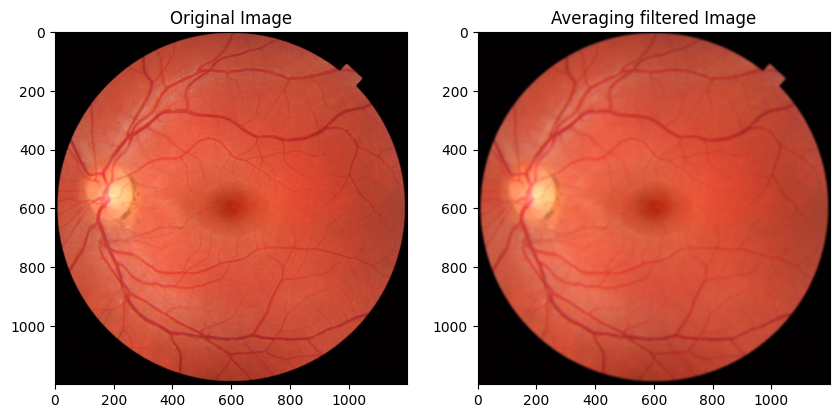

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('/content/Fundus_photograph_of_normal_left_eye.jpg')

avg = cv.blur(image,(10,10))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Averaging filtered Image')
plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))
plt.show()

## 2. Explore more image augmentation (geometric) techniques, apply them to the medical images and your own research work.



*   **Rotation**



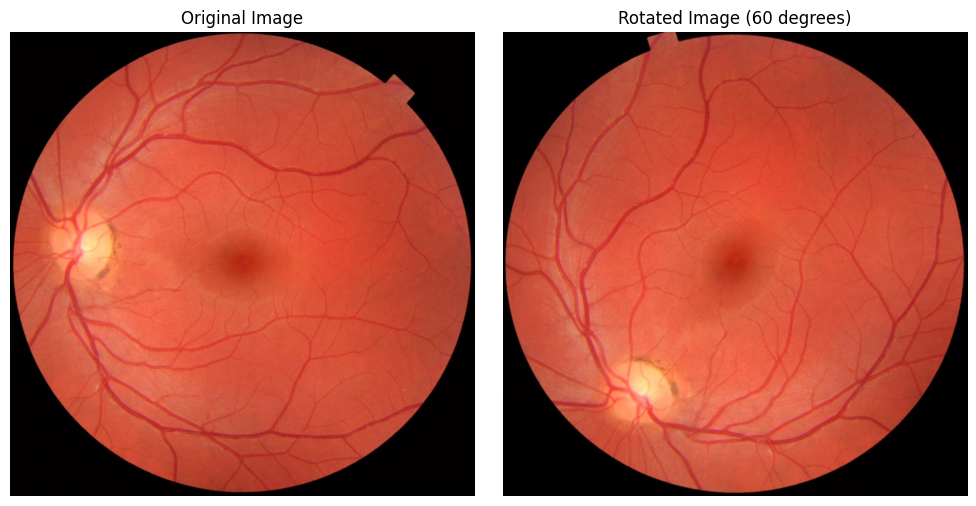

In [ ]:
import cv2
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (w, h))
    return rotated_image

# Load the original image
img = cv2.imread('/content/Fundus_photograph_of_normal_left_eye.jpg')  # Replace with your image path

# Rotate the image by 60 degrees
rotated_img = rotate_image(img, 60)

# Plot the original and rotated images
plt.figure(figsize=(10, 5))  # Adjust figure size

# Original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Rotated image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (60 degrees)')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()




*   **Zooming**




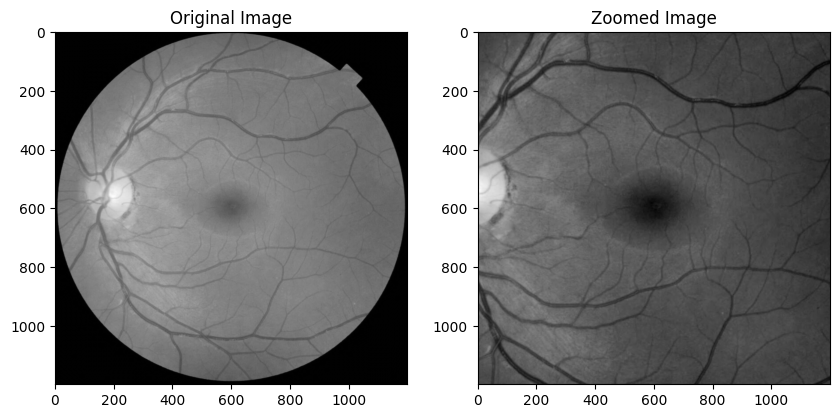

In [ ]:
def zoom_image(image, zoom_factor):
    height, width = image.shape[:2]
    # Calculate cropping coordinates
    new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)
    top = (height - new_height) // 2
    left = (width - new_width) // 2
    bottom = top + new_height
    right = left + new_width

    # Crop and resize the image
    cropped_image = image[top:bottom, left:right]
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)
    return zoomed_image

image = cv2.imread('/content/Fundus_photograph_of_normal_left_eye.jpg', cv2.IMREAD_GRAYSCALE)
zoomed_image = zoom_image(image, 1.5)

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.show()

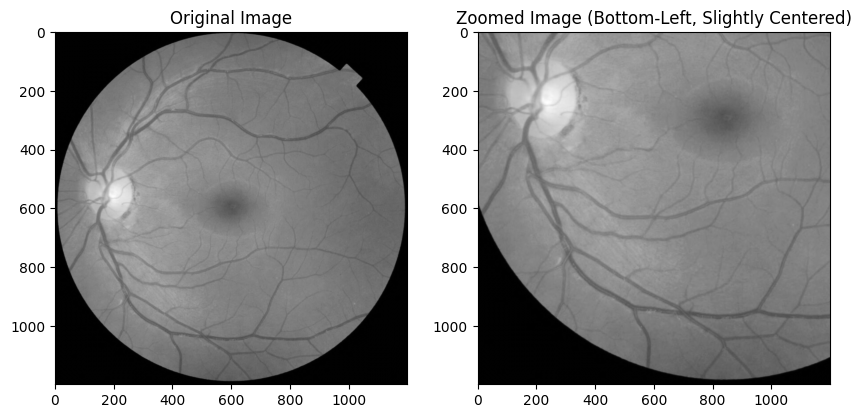

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(image, zoom_factor, region='bottom_left_slightly_centered'):
    height, width = image.shape[:2]

    if region == 'bottom_left_slightly_centered':
        # Define the new region closer to the center of the bottom-left corner
        new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)

        # Adjust the top and left positions to zoom slightly to the center
        top = height - new_height  # Start from the bottom

        # Adjust left position to crop 30% from the right
        left = width - new_width - int(width * 0.3)  # Move 30% from the right

    # Crop the image based on the region
    cropped_image = image[top:top+new_height, left:left+new_width]

    # Resize the cropped image back to original size (zoom effect)
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

# Load image in grayscale
image = cv2.imread('/content/Fundus_photograph_of_normal_left_eye.jpg', cv2.IMREAD_GRAYSCALE)

# Zoom into the bottom-left region close to the center
zoomed_image = zoom_image(image, zoom_factor=1.5, region='bottom_left_slightly_centered')

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image (Bottom-Left, Slightly Centered)')
plt.imshow(zoomed_image, cmap='gray')
plt.show()



*   **Flipping**




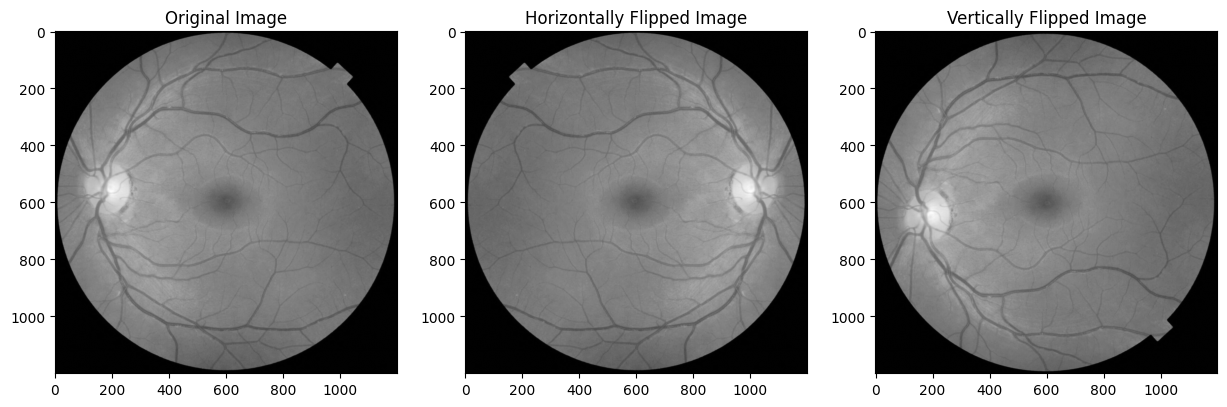

In [ ]:
# Horizontal flip
flipped_image_h = cv2.flip(image, 1)
# Vertical flip
flipped_image_v = cv2.flip(image, 0)

# Display input and output images side by side
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Horizontally Flipped Image')
plt.imshow(flipped_image_h, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Vertically Flipped Image')
plt.imshow(flipped_image_v, cmap='gray')
plt.show()